Nombre de los participantes Proyecto
Juan José Naranjo Velásquez CC : 1039474689
Alejandro Mora Suarez CC: 1128437044
Kenneth David Leonel Triana CC: 1192817456

[Problemática](https://www.elcolombiano.com/medellin/con-tos-y-gripa-viven-en-las-zonas-con-la-peor-calidad-del-aire-del-aburra-KB25241931)

La calidad del aire en Medellín juega un papel importante para adultos mayores, niños menores de 5 años, mujeres embarazadas y gente con afecciones cardiorrespiratorias, dado que una mala calidad del aire influye con afecciones respiratorias, cardiacas, de la piel y hasta con la aparición de cáncer.

Dentro de las métricas que acompaña la calidad del aire, el número de 2.5 micras es de gran relevancia dado que se toma como patrón para medir las partículas con un tamaño minúsculo y penetran más fácil en órganos como los pulmones.


**Objetivo proyecto**: Determinar la incidencia de las variables metereológicas sobre la métrica pm2.5 para la calidad del aire.

In [42]:
#Instalar librerias

#%pip install pandas numpy ydata-profiling ipywidgets numba

In [43]:
# importar librerias
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
#import numba
#from numba import njit


Obtener los datos y dejarlos en dataframes

In [44]:
#Extraer datos de calidad del aire en las estaciones  # 69 Caldas, 86 Aranjuez, 28 Itagui
def get_data (url):
    """
    Función utilizada para la obtención de datos en tipo DataFrame según las bases de datos del repositorio

    In[0]: url del dataset en el repositorio
    Out[0]: DataFrame con los datos extraídos
    """
    return pd.read_csv(url)

# Datos de la calidad del aire tomados desde red SIATA de monitoreo de calidad del aire en Valle de Aburra
cal_aire_ita = 'https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/estacion_data_calidadaire_28_20240301_20240331.csv'
cal_aire_cal = 'https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/estacion_data_calidadaire_69_20240301_20240331.csv'
cal_aire_ara = 'https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/estacion_data_calidadaire_86_20240301_20240331.csv'


cal_aire_ita = get_data(cal_aire_ita)
cal_aire_cal = get_data(cal_aire_cal)
cal_aire_ara = get_data(cal_aire_ara)

# Datos de temperatura,presion,humedad,precipitacion y vientos estacion itagui 28
temp_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/Temperatura/estacion_data_temperatura_252__20240201_20240229.csv'
humedad_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/humedad/estacion_data_humedad_252__20240201_20240229.csv'
presion_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/presion/estacion_data_presion_252__20240201_20240229.csv'
precipitacion_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
vientos_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/vientos/estacion_data_vientos_252__20240201_20240229.csv'

temp_ita=get_data(temp_ita)
humedad_ita=get_data(humedad_ita)
presion_ita=get_data(presion_ita)
precipitacion_ita=get_data(precipitacion_ita)
vientos_ita=get_data(vientos_ita)


# Datos de temperatura,presion,humedad,precipitacion y vientos estacion Caldas 69
temp_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/Temperatura/estacion_data_temperatura_105__20240201_20240229.csv'
humedad_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/humedad/estacion_data_humedad_105__20240201_20240229.csv'
precipitacion_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
presion_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/presion/estacion_data_presion_105__20240201_20240229.csv'
vientos_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/vientos/estacion_data_vientos_105__20240201_20240229.csv'

temp_cal=get_data(temp_cal)
humedad_cal=get_data(humedad_cal)
precipitacion_cal=get_data(precipitacion_cal)
presion_cal=get_data(presion_cal)
vientos_cal=get_data(vientos_cal)


# Datos de temperatura,presion,humedad,precipitacion y vientos estacion aranjuez 86
temp_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/temperatura/estacion_data_temperatura_68__20240201_20240229.csv'
humedad_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/humedad/estacion_data_humedad_68__20240201_20240229.csv'
precipitacion_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/precipitacion/estacion_data_precipitacion_68__20240201_20240229.csv'
presion_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/presion/estacion_data_presion_68__20240201_20240229.csv'
vientos_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/vientos/estacion_data_vientos_68__20240201_20240229.csv'

temp_aranj=get_data(temp_aranj)
humedad_aranj=get_data(humedad_aranj)
precipitacion_aranj=get_data(precipitacion_aranj)
presion_aranj=get_data(presion_aranj)
vientos_aranj=get_data(vientos_aranj)

# nombres de caracteristicas en minusculas calidad aire
cal_aire_ita.columns = cal_aire_ita.columns.str.lower()
cal_aire_cal.columns = cal_aire_cal.columns.str.lower()
cal_aire_ara.columns = cal_aire_ara.columns.str.lower()

#nombres de caracteristicas en minusculas Itagui
temp_ita.columns = temp_ita.columns.str.lower()
humedad_ita.columns = humedad_ita.columns.str.lower()
presion_ita.columns = presion_ita.columns.str.lower()
vientos_ita.columns = vientos_ita.columns.str.lower()
precipitacion_ita.columns = precipitacion_ita.columns.str.lower()

#nombres de caracteristicas en minusculas Aranjuez
temp_aranj.columns = temp_aranj.columns.str.lower()
humedad_aranj.columns = humedad_aranj.columns.str.lower()
precipitacion_aranj.columns = precipitacion_aranj.columns.str.lower()
presion_aranj.columns = presion_aranj.columns.str.lower()
vientos_aranj.columns = vientos_aranj.columns.str.lower()

#nombres de caracteristicas en minusculas Caldas
temp_cal.columns = temp_cal.columns.str.lower()
humedad_cal.columns = humedad_cal.columns.str.lower()
precipitacion_cal.columns = precipitacion_cal.columns.str.lower()
presion_cal.columns = presion_cal.columns.str.lower()
vientos_cal.columns = vientos_cal.columns.str.lower()

Puesto que los datos extraidos de la red SIATA presenta semejanza en el nombre de la columna "Calidad" se procede a liminar esas columnas

### Eliminación de la columnas de calidad ya que no influye

In [45]:
def eliminarColumnas(data, nombresColumnas):
    """
    Función para eliminar columnas en un dataframe
    """
    # Eliminar columnas que no sean necesarias
    data = data.drop(columns=nombresColumnas)
    return data

#-----------------------------------------------------------------
# Eliminar columna calidad de los diferentes dataframes de Itagui
columnasAEliminar = ['calidad_pm25','calidad_pm10','calidad_pm1','calidad_no','calidad_p_ssr',
                     'calidad_pliquida_ssr','calidad_rglobal_ssr','calidad_taire10_ssr',
                     'calidad_vviento_ssr','calidad_no2','calidad_nox','calidad_pst','calidad_dviento_ssr',
                     'calidad_haire10_ssr','calidad_ozono','calidad_so2','calidad_co']
cal_aire_ita = eliminarColumnas(cal_aire_ita,columnasAEliminar)
temp_ita = eliminarColumnas(temp_ita,'calidad')
humedad_ita = eliminarColumnas(humedad_ita,'calidad')
presion_ita = eliminarColumnas(presion_ita,'calidad')
vientos_ita = eliminarColumnas(vientos_ita,'calidad')
precipitacion_ita = eliminarColumnas(precipitacion_ita,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Caldas
cal_aire_cal = eliminarColumnas(cal_aire_cal, columnasAEliminar)
temp_cal = eliminarColumnas(temp_cal,'calidad')
humedad_cal = eliminarColumnas(humedad_cal,'calidad')
precipitacion_cal = eliminarColumnas(precipitacion_cal,'calidad')
presion_cal = eliminarColumnas(presion_cal,'calidad')
vientos_cal = eliminarColumnas(vientos_cal,'calidad')

# Eliminar columna calidad de los diferentes dataframes de Aranjuez
cal_aire_ara = eliminarColumnas(cal_aire_ara ,columnasAEliminar)
temp_aranj = eliminarColumnas(temp_aranj,'calidad')
humedad_aranj = eliminarColumnas(humedad_aranj,'calidad')
precipitacion_aranj = eliminarColumnas(precipitacion_aranj,'calidad')
presion_aranj = eliminarColumnas(presion_aranj,'calidad')
vientos_aranj = eliminarColumnas(vientos_aranj,'calidad')



Se muestra uno de los dataframes ya sin las columnas de calidad

In [46]:
# Dataframe de la calidad del aire estación Itagui sin columnas Calidad
cal_aire_ita.head(3)

,fecha_hora,codigoserial,pm25,pm10,pm1,no,no2,nox,ozono,co,so2,pst,dviento_ssr,haire10_ssr,p_ssr,pliquida_ssr,rglobal_ssr,taire10_ssr,vviento_ssr
0,2024-02-01 00:00:00,28,18.0,-9999.0,-9999.0,-9999.0000,-9999.0000,-9999.0000,-9999.0,-9999.0,1.57263,-9999.0,351.7,71.6,636.6,-9999.0,-9999.0,21.8,1.4
1,2024-02-01 01:00:00,28,17.0,-9999.0,-9999.0,4.5361,10.5753,15.1114,-9999.0,-9999.0,1.63428,-9999.0,345.9,72.4,636.4,-9999.0,0.0,21.6,1.3
2,2024-02-01 02:00:00,28,26.0,-9999.0,-9999.0,-9999.0000,-9999.0000,-9999.0000,-9999.0,-9999.0,1.72603,-9999.0,352.5,72.3,636.1,-9999.0,0.0,21.5,1.0


Filtrar el dataframe calidad aire para tomar las columnas objetivo del proyecto (Puede que esta función ya no la usemos)

In [47]:
def filtro_data_peque(data):
    """"
    Función para tomar columnas de estudio en archivos de calidad del aire en las diferentes estaciones

    In[0]: dataset
    Out[0]: dataset filtrado hasta columna de estudio
    """
    # Filtrar los datos segun el indice
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:3]
    return datosFiltrados

def filtro_data(data,nombreColumna,condicion):
    """"
    Función para tomar calidad de datos en tiempo real establecidos desde datos crudos

    In[0]: dataset, 'calidad_pm25', 1
    Out[0]: dataset filtrado con datos en calidad
    """
    # Filtrar los datos segun el indice y la condicion
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:4]
        return datosFiltrados[datosFiltrados.loc[:, nombreColumna] == condicion]
    else:
       return data.loc[data.loc[:, nombreColumna] == condicion]

#Se tiene el filtrado estación Itagui
dataCalidadFiltradaItagui = filtro_data_peque(cal_aire_ita)

#Se tiene el filtrado estación Caldas
dataCalidadFiltradaCaldas = filtro_data_peque(cal_aire_cal)

#Se tiene el filtrado estación Aranjuez
dataCalidadFiltradaAranjuez = filtro_data_peque(cal_aire_ara)

#Visualizar datos calidad aire itagui
dataCalidadFiltradaItagui

,fecha_hora,codigoserial,pm25
0,2024-02-01 00:00:00,28,18.0
1,2024-02-01 01:00:00,28,17.0
2,2024-02-01 02:00:00,28,26.0
3,2024-02-01 03:00:00,28,27.0
4,2024-02-01 04:00:00,28,29.0
...,...,...,...
1435,2024-03-31 19:00:00,28,26.0
1436,2024-03-31 20:00:00,28,41.0
1437,2024-03-31 21:00:00,28,35.0
1438,2024-03-31 22:00:00,28,38.0


### Crear columnas día de la semana si es festivo o no ese día , mirar si se crean bins( rangos por horas), hacer medianas , mirar si es mejor que el codigo serial cambiarlo mejor por categorica es decir por l nombre de la estación

Dado que los registros que se tienen por las características metereológicas se encuentran por minuto, debemos llevarlos a la estructura o base del dataset que almacena la calidad del aire bajo registros por dia, por ende, se realiza el promedio de los dataframes (Temperatura , precipitación, Vientos, Humedad, Presion) de las diferentes estaciones para homogeneizar la base final

In [48]:
from scipy import stats
def agregarColumnas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['fecha_hora']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['fecha_hora']).dt.month
    return dataTemporal



def sacarPromedio(data,nombreColumna,revision):
    """"
    Función para calcular el promedio de todas las columnas de un dataframe

    args:   data =  dataframe a utilizar
            nombrecolumna = característica a la cual se le realiza el promedio
            revision = indicador de revision (1,2,3) según las columnas de los dataframes
            1 si el dataframe contiene únicamente para nombre de columna y calidad
            2 si el dataframe contiene las columnas nombre de columna, calidad y codigo serial
            3 si el dataframe contiene las columnas nombre de columna, calidad y se aplican las demas características en este caso del viento

    In[0]: dataset
    Out[0]: promedio de cada columna
    """
    #Llamamos a la funcion agregarColumnas
    dataNuevo = agregarColumnas(data)
    #return dataNuevo
    #se saca el promedio de temperatura de la columna Temperatura

    if (revision ==1):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'mean'
        }).reset_index()
        return registroPromedio
    elif(revision ==2):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'mean',
            'codigoserial': lambda x: stats.mode(x)[0][0]
        }).reset_index()
        return registroPromedio
    elif(revision == 3):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'{nombreColumna}':'mean',
            'velocidad_max':'mean',
            'direccion_prom':'mean',
            'direccion_max':'mean'
        }).reset_index()
        return registroPromedio


In [55]:
#Sacar promedio Itagui
temperaturaItaguiPromedio = sacarPromedio(temp_ita, 'temperatura',1)
humedadItaguiPromedio = sacarPromedio(humedad_ita, 'humedad',1)
presionItaguiPromedio = sacarPromedio(presion_ita, 'presion',1)
precipitacionItaguiPromedio = sacarPromedio(precipitacion_ita, 'p1',1)
vientosItaguiPromedio = sacarPromedio(vientos_ita,'velocidad_prom',3)

#Sacar promedio Caldas
temperaturaCaldasPromedio = sacarPromedio(temp_cal, 'temperatura', 1)
humedadCaldasPromedio = sacarPromedio(humedad_cal,'humedad',1)
precipitacionCaldasPromedio = sacarPromedio(precipitacion_cal, 'p1',1)
presionCaldasPromedio = sacarPromedio(presion_cal, 'presion',1)
vientosCaldasPromedio = sacarPromedio(vientos_cal,'velocidad_prom',3)

#Sacar promedio Aranjuez
temperaturaAranjuezPromedio = sacarPromedio(temp_aranj, 'temperatura', 1)
humedadAranjuezPromedio = sacarPromedio(humedad_aranj,'humedad',1)
precipitacionAranjuezPromedio = sacarPromedio(precipitacion_aranj, 'p1',1)
presionAranjuezPromedio = sacarPromedio(presion_aranj, 'presion',1)
vientosAranjuezPromedio = sacarPromedio(vientos_aranj,'velocidad_prom',3)


Al dataframe dataCalidadFiltrada se necesita sacar el promedio por dia para después concatanar las demas variables con el dataframe

In [50]:
calidadAireItagui = sacarPromedio(dataCalidadFiltradaItagui, 'pm25',2)
calidadAireCaldas = sacarPromedio(dataCalidadFiltradaCaldas, 'pm25', 2)
calidadAireAranjuez = sacarPromedio(dataCalidadFiltradaAranjuez, 'pm25', 2)
calidadAireItagui.iloc[:3]

C:\Users\USER\AppData\Local\Temp\ipykernel_31780\968662908.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'codigoserial': lambda x: stats.mode(x)[0][0]
C:\Users\USER\AppData\Local\Temp\ipykernel_31780\968662908.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warni

,anio,mes,dia,pm25,codigoserial
0,2024,2,1,30.083333,28
1,2024,2,2,36.041667,28
2,2024,2,3,16.166667,28


### Crear función para tener el día de la semana en una columna a cada dataframe

In [51]:
def definirDia(anio, mes, dia):
    """
    Función para definir el día de la semana
    args:   anio = año del dato
            mes = mes del dato
            dia = día del dato
    In[0]: año, mes, dia
    Out[0]: día de la semana en español
    """
    dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
    # se crea un objeto de la fecha
    objetoFecha = datetime.date(int(anio), int(mes), int(dia))
    # obtener el índice del día de la semana (0 es Domingo, 6 es Sábado)
    indice_dia = int(objetoFecha.strftime("%w"))
    # obtener el nombre del día en español
    nombreDia = dias_semana[indice_dia]
    print(nombreDia)
    return nombreDia

In [57]:
# Aplicar la función a cada fila del DataFrame estación Itagui
calidadAireItagui['dia_semana'] = calidadAireItagui.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaItaguiPromedio['dia_semana'] = temperaturaItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosItaguiPromedio['dia_semana'] = vientosItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadItaguiPromedio['dia_semana'] = humedadItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionItaguiPromedio['dia_semana'] = precipitacionItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionItaguiPromedio['dia_semana'] = presionItaguiPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Caldas
calidadAireCaldas['dia_semana'] = calidadAireCaldas.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaCaldasPromedio['dia_semana'] = temperaturaCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosCaldasPromedio['dia_semana'] = vientosCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadCaldasPromedio['dia_semana'] = humedadCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionCaldasPromedio['dia_semana'] = precipitacionCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionCaldasPromedio['dia_semana'] = presionCaldasPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# Aplicar la función a cada fila del Dataframe estacion Aranjuez

calidadAireAranjuez['dia_semana'] = calidadAireAranjuez.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
temperaturaAranjuezPromedio['dia_semana'] = temperaturaAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
vientosAranjuezPromedio['dia_semana'] = vientosAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
humedadAranjuezPromedio['dia_semana'] = humedadAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
precipitacionAranjuezPromedio['dia_semana'] = precipitacionAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
presionAranjuezPromedio['dia_semana'] = presionAranjuezPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)


Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Jueves
Viernes
Sabado
Domingo
Lunes
Martes
Miercoles
Jueves
Viernes
Sabado
Domingo
Lunes
Mar

### Se detalla uno de los dataframes sobre esta nueva columna dia_semana

In [69]:
calidadAireItagui.head(3)

,anio,mes,dia,pm25,codigoserial,dia_semana
0,2024,2,1,30.083333,28,Jueves
1,2024,2,2,36.041667,28,Viernes
2,2024,2,3,16.166667,28,Sabado


### Se agrega columna  categorica dependiendo del codigo serial 


In [71]:

def categoriaCodigoSerial(codigo):
    """
    Función para definir la categoría de calidad del aire
    args:   codigo = código serial de calidad del aire
    In[0]: código serial
    Out[0]: categoría de calidad del aire
    """
    if codigo == 28:
        return 'Estacion Itagui'
    elif codigo == 69:
        return 'Estacion Caldas'
    elif codigo == 86:
        return 'Estacion Aranjuez'

# Aplicar la función a cada fila del DataFrame estación Itagui
calidadAireItagui['estacion'] = calidadAireItagui.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Caldas
calidadAireCaldas['estacion'] = calidadAireCaldas.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Aplicar la función a cada fila del DataFrame estación Aranjuez
calidadAireAranjuez['estacion'] = calidadAireAranjuez.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)

# Se muestran los primeros 3 registros de los dataframes con la nueva columna

calidadAireItagui.head(3)

,anio,mes,dia,pm25,codigoserial,dia_semana,estacion
0,2024,2,1,30.083333,28,Jueves,Estacion Itagui
1,2024,2,2,36.041667,28,Viernes,Estacion Itagui
2,2024,2,3,16.166667,28,Sabado,Estacion Itagui


### Se crea una columba binaria sobre si ese dia fue festivo o no

In [81]:
import pandas as pd
import datetime
import holidays

# Obtener los festivos de Colombia
festivosColombia = holidays.CO()

# Función para verificar si es festivo
def es_festivo(anio, mes, dia):
    try:
        fecha = datetime.date(int(anio), int(mes), int(dia))
        festivo = fecha in festivosColombia
        if festivo == True :
            return 1
        else :
            return 0
    except ValueError:
        return None  # Retornar None si hay un valor inválido


# Aplicamos la función es_festivo
calidadAireItagui['festivo'] = calidadAireItagui.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)

# resultado para ver que el 25 de marzo fue festivo igual que el 29 y 29 representando el jueves y viernes santo
calidadAireItagui.iloc[53:58]


,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,festivo
53,2024,3,25,27.500000,28,Lunes,Estacion Itagui,1
54,2024,3,26,27.916667,28,Martes,Estacion Itagui,0
55,2024,3,27,35.166667,28,Miercoles,Estacion Itagui,0
56,2024,3,28,29.833333,28,Jueves,Estacion Itagui,1
57,2024,3,29,29.458333,28,Viernes,Estacion Itagui,1


Unión de dataFrames

In [72]:
#Unir los dataframes
def unirDatos(data1, data2):
    """"
    Función para unir dos dataframes
    In[0]: dataset1, dataset2
    Out[0]: dataset unido
    """
    return pd.merge(data1,data2,on=['anio','mes','dia','dia_semana'],how='inner')

#Unir los dataframes de la estación Itagui
calidadAireItaguiUnido = unirDatos(calidadAireItagui,temperaturaItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,humedadItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,presionItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,precipitacionItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,vientosItaguiPromedio)

#Unir los dataframes de la estación Caldas
calidadAireCaldasUnido = unirDatos(calidadAireCaldas,temperaturaCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,humedadCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,precipitacionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,presionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,vientosCaldasPromedio)

#Unir los dataframes de la estación Aranjuez
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuez,temperaturaAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,humedadAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,precipitacionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,presionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,vientosAranjuezPromedio)

calidadAireItaguiUnido.iloc[:3]

,anio,mes,dia,pm25,codigoserial,dia_semana,estacion,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2024,2,1,30.083333,28,Jueves,Estacion Itagui,21.203368,84.515444,0.0,0.031583,1.911458,2.690764,84.141667,101.645139
1,2024,2,2,36.041667,28,Viernes,Estacion Itagui,21.548194,82.776438,0.0,0.042090,1.568583,2.275486,158.501389,172.629861
2,2024,2,3,16.166667,28,Sabado,Estacion Itagui,20.828431,83.795549,0.0,0.023139,1.368840,2.092778,154.681944,161.095833


In [13]:
def ConcatenadoRegistros(*data):
    """"
    Función para concatenar dataframes
    In[0]: (dataset1, dataset2, dataset3, ..., datasetn)
    Out[0]: dataset concatenado
    """
    return pd.concat([*data], axis=0)

dataSetCalidadAire = ConcatenadoRegistros(calidadAireItaguiUnido, calidadAireCaldasUnido, calidadAireAranjuezUnido)

In [14]:
#Generacion de la clase Calidad del aire
#Clase que funciona correctamente con el metodo add
class CalidadAire():
    """
      Clase Calidad del aire
      Esta clase srive para adicionar los datos de la calidad del aire por estacion  con cada uno de
      las varias en presion, pre
    """
    def __init__(self, mes:int,dia:int,pm25:float,calidad_pm25:int,codigoserial:int,temperatura:float,
                 calidad_temperatura:int,humedad:float,calidad_humedad:int,presion:float,
                 p1:float,calidad_precipitacion:int,calidad_presion:int,velocidad_prom:float,
                 calidad_viento:int,velocidad_max:float,direccion_prom:float,direccion_max:float):
        self.info={
            "mes":mes,
            "dia":dia,
            "pm25":pm25,
            "calidad_pm25":calidad_pm25,
            "codigoserial":codigoserial,
            "temperatura":temperatura,
            "calidad_temperatura":calidad_temperatura,
            "humedad":humedad,
            "calidad_humedad":calidad_humedad,
            "presion":presion,
            "p1":p1,
            "calidad_precipitacion":calidad_precipitacion,
            "calidad_presion":calidad_presion,
            "velocidad_prom":velocidad_prom,
            "calidad_viento":calidad_viento,
            "velocidad_max":velocidad_max,
            "direccion_prom":direccion_prom,
            "direccion_max":direccion_max,

        }

    def adicionarData(self, dataSet):
        newDataSet=pd.DataFrame([self.info])

        dataSet=pd.concat([dataSet,newDataSet],axis=0)

        return dataSet

cal_aire = CalidadAire(2,2,25.2,1,68,28.3,155,84.5,1,0.0,0.05,1,1,1.5,155,2.5,155.4,170.3)

In [15]:
cal_aire.adicionarData(dataSetCalidadAire)

,mes,dia,pm25,codigoserial,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,calidad_pm25,calidad_temperatura,calidad_humedad,calidad_precipitacion,calidad_presion,calidad_viento
0,2,1,30.083333,28,21.203368,84.515444,0.000000,0.031583,1.911458,2.690764,84.141667,101.645139,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,36.041667,28,21.548194,82.776438,0.000000,0.042090,1.568583,2.275486,158.501389,172.629861,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,16.166667,28,20.828431,83.795549,0.000000,0.023139,1.368840,2.092778,154.681944,161.095833,NaN,NaN,NaN,NaN,NaN,NaN
3,2,4,23.458333,28,20.938090,81.345444,0.000000,0.001792,1.157125,1.656389,162.447222,177.250694,NaN,NaN,NaN,NaN,NaN,NaN
4,2,5,29.666667,28,20.919458,80.495264,0.000000,0.001521,1.250153,2.090069,189.303472,195.139583,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3,28,34.303346,86,24.025278,63.482431,852.814097,0.000000,1.977708,3.635903,175.940972,171.405556,NaN,NaN,NaN,NaN,NaN,NaN
57,3,29,-389.206004,86,23.458819,65.010208,852.446458,0.000035,1.929583,3.559375,174.241667,173.286806,NaN,NaN,NaN,NaN,NaN,NaN
58,3,30,33.911246,86,23.629167,65.643403,851.854097,0.000000,1.952778,3.571667,169.008333,168.874306,NaN,NaN,NaN,NaN,NaN,NaN
59,3,31,41.063325,86,21.602708,78.103958,852.681875,0.001333,1.458681,2.623889,139.196528,142.368056,NaN,NaN,NaN,NaN,NaN,NaN


Visualizamos la correlacion que tienen las caracteristicas sobre la variable de respuesta pm25

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10020\1667509082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')


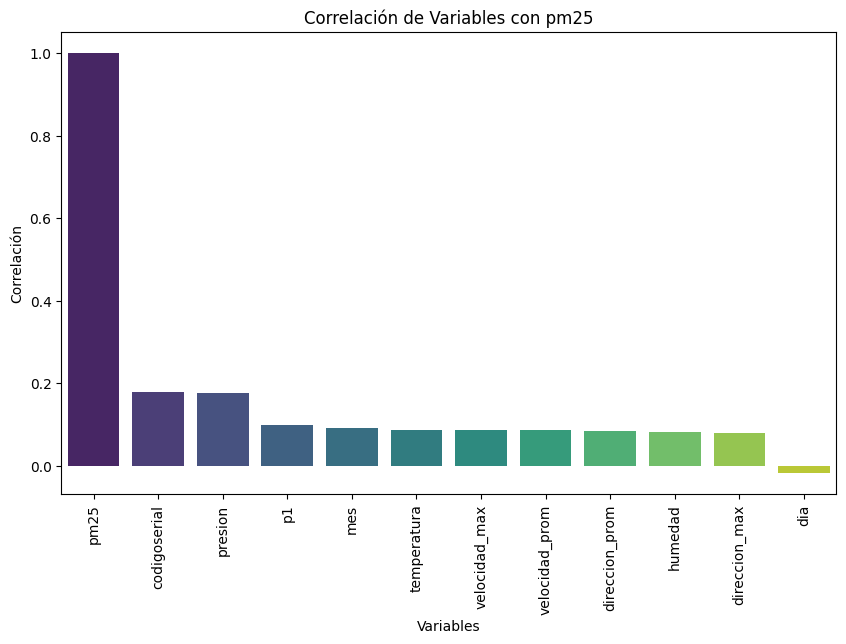

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación de todas las variables con "pm25"
correlation = dataSetCalidadAire.corr()['pm25'].sort_values(ascending=False)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Correlación de Variables con pm25')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

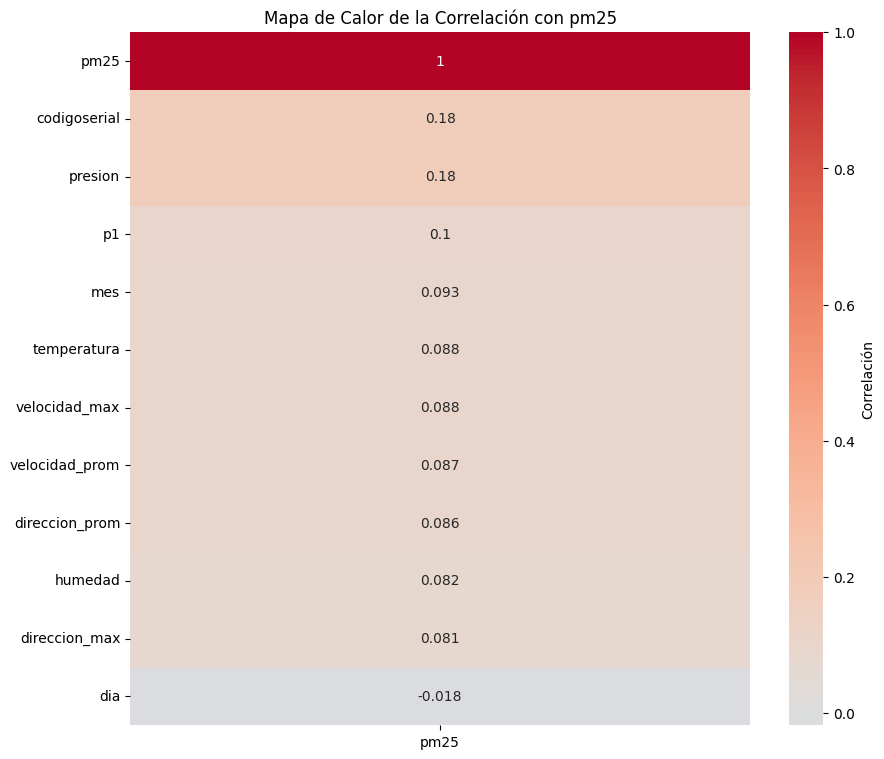

In [17]:
# Calcular la matriz de correlación
correlation_matrix = dataSetCalidadAire.corr()

# Filtrar para incluir solo la fila y columna de "pm25"
correlation_pm25 = correlation_matrix[['pm25']].sort_values(by='pm25', ascending=False)

# Crear el heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_pm25, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlación'})
plt.title('Mapa de Calor de la Correlación con pm25')
plt.show()

Análisis exploratorio de los datos

In [18]:
dataSetCalidadAire.describe()

,mes,dia,pm25,codigoserial,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2.516667,15.516667,398.910510,61.000000,-37.432939,5.708961,451.746707,-116.921109,-57.119570,-56.029210,70.374823,74.356258
std,0.501116,8.708485,1867.328053,24.412654,236.971624,247.626450,528.430859,317.054825,232.099029,232.371567,265.700656,266.463443
min,2.000000,1.000000,-1235.533741,28.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,2.000000,8.000000,21.115891,28.000000,21.149672,60.754462,0.000000,0.000000,1.508333,2.365677,109.082986,114.858854
50%,3.000000,15.500000,29.484673,69.000000,22.569056,67.109410,825.437187,0.000000,1.790691,2.841042,136.231597,143.168750
75%,3.000000,23.000000,36.236144,86.000000,24.010530,74.028226,850.274757,0.000144,2.082313,3.424931,159.216667,162.800000
max,3.000000,31.000000,16692.347842,86.000000,25.805556,84.515444,853.860903,0.064528,3.443611,4.993056,218.192361,202.665278


In [19]:
tablaPivote = dataSetCalidadAire.pivot_table(index = 'codigoserial',
                               columns = 'mes',
                               aggfunc = {'pm25':'mean',
                                          'presion':'mean',
                                          'p1':'mean'})
tablaPivote

p1                    pm25                  presion  \
mes                  2           3           2            3           2   
codigoserial                                                              
28           -0.256778 -338.280332   27.594828    37.893817   -1.842026   
69           -0.256778 -338.280332  366.895838    70.739629  825.554124   
86           -0.022337   -1.834779  264.725515  1590.935023  851.759164   

                          
mes                    3  
codigoserial              
28             -0.044758  
69            207.692137  
86            848.021673

In [20]:
precipitacion_ita.p1.value_counts()
precipitacion_ita.groupby('p1')

In [21]:
pd.concat([presion_aranj, presion_ita, presion_cal],axis=1)

,fecha_hora,presion,fecha_hora,presion,fecha_hora,presion
0,2024-02-01 00:00:00,852.9,2024-02-01 00:00:00,0.0,2024-02-01 00:00:00,827.1
1,2024-02-01 00:01:00,852.8,2024-02-01 00:01:00,0.0,2024-02-01 00:01:00,827.1
2,2024-02-01 00:02:00,852.8,2024-02-01 00:02:00,0.0,2024-02-01 00:02:00,827.1
3,2024-02-01 00:03:00,852.8,2024-02-01 00:03:00,0.0,2024-02-01 00:03:00,827.0
4,2024-02-01 00:04:00,852.8,2024-02-01 00:04:00,0.0,2024-02-01 00:04:00,827.0
...,...,...,...,...,...,...
86395,2024-03-31 23:55:00,854.2,2024-03-31 23:55:00,0.0,2024-03-31 23:55:00,-999.0
86396,2024-03-31 23:56:00,854.2,2024-03-31 23:56:00,0.0,2024-03-31 23:56:00,-999.0
86397,2024-03-31 23:57:00,854.2,2024-03-31 23:57:00,0.0,2024-03-31 23:57:00,-999.0
86398,2024-03-31 23:58:00,854.2,2024-03-31 23:58:00,0.0,2024-03-31 23:58:00,-999.0


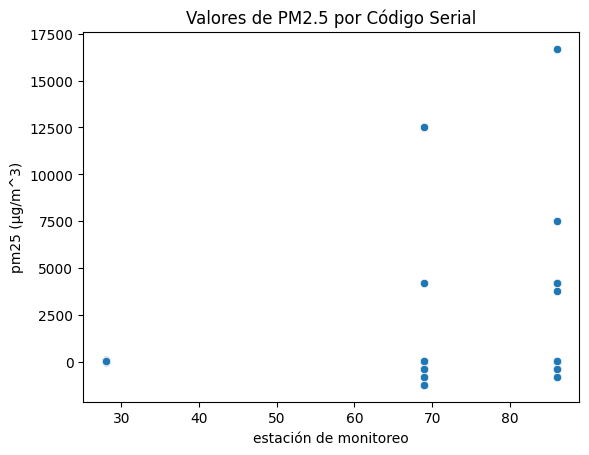

In [22]:
# Grafico por puntos
sns.scatterplot(x=dataSetCalidadAire['codigoserial'], y=dataSetCalidadAire['pm25'])
plt.title('Valores de PM2.5 por Código Serial')
plt.xlabel('estación de monitoreo')
plt.ylabel('pm25 (µg/m^3)')
plt.show()

Text(0.5, 1.0, 'Valores de P1 por Codigo serial')

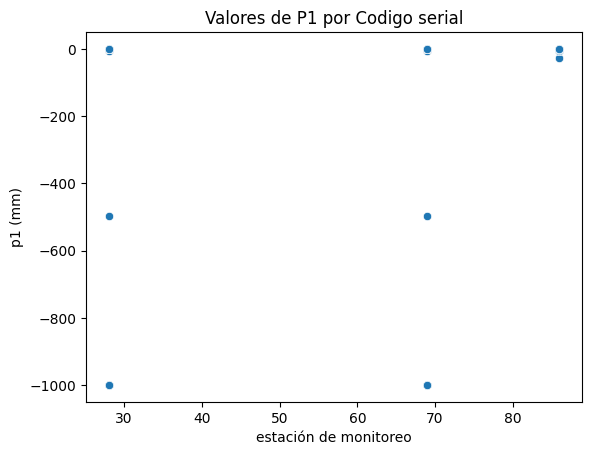

In [23]:
# Grafico de dispersión por p1

sns.scatterplot(x=dataSetCalidadAire['codigoserial'], y=dataSetCalidadAire['p1'])
plt.xlabel('estación de monitoreo')
plt.ylabel('p1 (mm)')
plt.title('Valores de P1 por Codigo serial')


Pandas profile

In [24]:
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
#Generar y mostrar el reporte
reporte = ProfileReport(dataSetCalidadAire,
                        title="Reporte estadístico",
                        explorative=True,
                        dataset={
                        "description": "Este es un analisis preeliminar para comprender de mejor forma los datos de nuestro dataset",
                        "author": "Kenneth David Leonel Triana , Juan Jose Naranjo, Alejandro Mora",
                        "url": "https://github.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra",
                    },)
reporte.to_notebook_iframe()
reporte.to_file("reporte.html")

Aspectos de mejora de la exploración de datos

Al detallar el comportamiento del dataset nos dimos cuenta que se debe mejorar las sigueintes cosas:

- Limpieza de datos: Existen algunos datos con valores negativos que podrian referirse a datos faltantes, sin embargo, en el datset se reflejan con valores como -9999. Este es un aspecto a mejorar ya que al realizar el promedio de las columnas detallamos que el promedio arroja valores negativos sin sentido.

- Normalización de datos: Al explorar los dataset detallamos que es se puede normalizar las columnas temperatura, humedad, presion o pm25.

- Eliminación de datos: Las personas que continuen con la mejora de los resultados presentados pueden detallar si esos valores atipicos en ciertos registros se puedan considerar a eliminar.

- Transformación de datos: Al explorar los dataset detallamos que algunas columnas pueden tener una distribución diferente a la normal, lo que puede afectar a los resultados.

- Revisión de estaciones de monitoreo: Tener en cuenta los datos con sentido de las variables metereológicas en las diferentes estaciones, dado que puede existir la posibilidad que los sensores de alguna de ellas no arroje resultados coherentes o no estén en funcionamiento.

